### A binned bispectrum calculation in flat sky

#### This code demonstrates how to compute the flatsky binned bispectrum from a 2D map

In [1]:
import numpy as np
import tqdm
from cmblensplus import flatsky
import cmb
import binning
from matplotlib.pyplot import *

In [2]:
# parameters
lmax = 512
nx, ny = 256, 256
D  = np.array([nx,ny]) / 5.*np.pi/180.
bn = 20
mc = 100

In [3]:
# binned multipoles
bp, bc = binning.binned_ells(bn,2,lmax,'')

In [4]:
# load unlensed and lensed Cls
l = np.linspace(0,lmax,lmax+1)
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:lmax+1]

In [5]:
bf1 = flatsky.bispec.binfilter(nx,ny,D,bp)
bfs = np.array((bf1,bf1,bf1)) # equiratellal shape

In [6]:
norm = flatsky.bispec.bispec_norm_1d(nx,ny,D,bfs) # normalization of the binned bispectrum estimator

In [7]:
# loop over MC realizations
Bl = np.zeros((mc,bn))

for i in tqdm.tqdm(range(mc)):
    
    # generate Fourier mode on 2d grids
    tlm  = flatsky.utils.gauss1alm(nx,ny,D,2,lmax,lcl[0,:])

    # compute a non-Gaussian map
    tmap = flatsky.utils.alm2map(nx,ny,D,tlm)
    Tlm  = flatsky.utils.map2alm(nx,ny,D,tmap**2)

    # compute bispectrum
    Tlms = np.array((tlm,tlm,Tlm))    
    Bl[i,:] = flatsky.bispec.bispec_bin_1d(nx,ny,D,bfs,norm,Tlms)


100%|██████████| 100/100 [00:30<00:00,  3.26it/s]


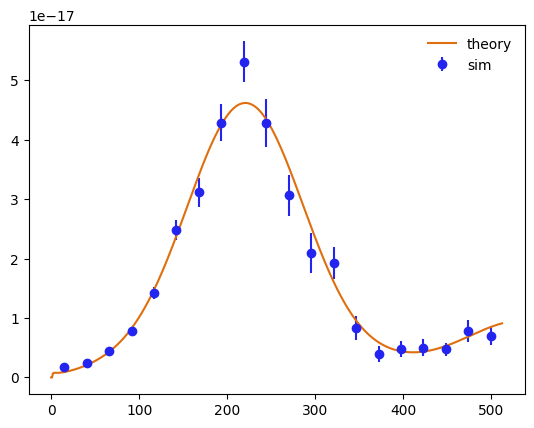

In [8]:
N = 4
mBks = np.mean(bc[None,:]**N*Bl,axis=0)
vBks = np.std(bc[None,:]**N*Bl,axis=0)
errorbar(bc,mBks,yerr=vBks/np.sqrt(mc),fmt='o',label='sim')
plot(l,2*l**N*lcl[0]**2,label='theory')
legend()